In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import footballdata as foo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
sns.set_style("darkgrid")

# 2016-17 Forecasts

In [2]:
five38 = foo.FiveThirtyEight()
print(five38.__doc__)

 Provides pandas.DataFrames from the fivethirtyeight.com project
    "2016-17 Club Soccer Predictions"

    Data will be downloaded as necessary and cached locally in ./data

    Original project and background info:
    https://projects.fivethirtyeight.com/soccer-predictions/
    https://fivethirtyeight.com/features/how-our-club-soccer-projections-work/

    Source JSON:
    https://projects.fivethirtyeight.com/soccer-predictions/data.json

    Parameters
    ----------
    leagues : string or iterable of league-ids to include, None for all
    


In [3]:
leagues = five38.read_leagues()
leagues

,champions,league_id,longName,relegated,teams
league,,,,,
Champions League,0,1818,Champions League,0,32
ENG-Premier League,4,2411,Premier League,3,20
ESP-La Liga,4,1869,La Liga,3,20
FRA-Ligue 1,3,1843,Ligue 1,2,20
GER-Bundesliga,4,1845,Bundesliga,2,18
ITA-Serie A,3,1854,Serie A,3,20
MEX-Liga MX,4,1975,Liga MX,1,18
USA-MLS,3,1951,MLS,0,22
USA-NWSL,0,4582,NWSL,0,10


In [4]:
games = five38.read_games()
games.sample(5)

adj_score_home  \
league         season game_id                                                      
ESP-La Liga    1617   2017-01-22 Osasuna-Sevilla FC                         3.15   
GER-Bundesliga 1617   2017-01-27 Schalke 04-Eintracht Frankfurt             0.00   
USA-MLS        1617   2017-04-29 New York Red Bulls-Chicago Fire            2.10   
MEX-Liga MX    1617   2017-02-04 Morelia-Club América                       0.00   
                      2017-04-16 Puebla-Cruz Azul                           2.10   

                                                                  adj_score_away  \
league         season game_id                                                      
ESP-La Liga    1617   2017-01-22 Osasuna-Sevilla FC                        3.675   
GER-Bundesliga 1617   2017-01-27 Schalke 04-Eintracht Frankfurt            1.050   
USA-MLS        1617   2017-04-29 New York Red Bulls-Chicago Fire           1.050   
MEX-Liga MX    1617   2017-02-04 Morelia-Club América                      1.775   
                      2017-04-16 Puebla-Cruz Azul                          1.050   

                                                                  aggregate_winner  \
league         season game_id                                                        
ESP-La Liga    1617   2017-01-22 Osasuna-Sevilla FC                            NaN   
GER-Bundesliga 1617   2017-01-27 Schalke 04-Eintracht Frankfurt                NaN   
USA-MLS        1617   2017-04-29 New York Red Bulls-Chicago Fire               NaN   
MEX-Liga MX    1617   2017-02-04 Morelia-Club América                          NaN   
                      2017-04-16 Puebla-Cruz Azul                              NaN   

                                                                  chances_home  \
league         season game_id                                                    
ESP-La Liga    1617   2017-01-22 Osasuna-Sevilla FC                      0.701   
GER-Bundesliga 1617   2017-01-27 Schalke 04-Eintracht Frankfurt          0.838   
USA-MLS        1617   2017-04-29 New York Red Bulls-Chicago Fire         1.027   
MEX-Liga MX    1617   2017-02-04 Morelia-Club América                    0.684   
                      2017-04-16 Puebla-Cruz Azul                        0.384   

                                                                  chances_away  \
league         season game_id                                                    
ESP-La Liga    1617   2017-01-22 Osasuna-Sevilla FC                      1.164   
GER-Bundesliga 1617   2017-01-27 Schalke 04-Eintracht Frankfurt          0.504   
USA-MLS        1617   2017-04-29 New York Red Bulls-Chicago Fire         1.273   
MEX-Liga MX    1617   2017-02-04 Morelia-Club América                    2.326   
                      2017-04-16 Puebla-Cruz Azul                        0.334   

                                                                                date  \
league         season game_id                                                          
ESP-La Liga    1617   2017-01-22 Osasuna-Sevilla FC              2017-01-22 11:00:00   
GER-Bundesliga 1617   2017-01-27 Schalke 04-Eintracht Frankfurt  2017-01-27 19:30:00   
USA-MLS        1617   2017-04-29 New York Red Bulls-Chicago Fire 2017-04-29 23:30:00   
MEX-Liga MX    1617   2017-02-04 Morelia-Club América            2017-02-04 20:00:00   
                      2017-04-16 Puebla-Cruz Azul                2017-04-16 23:00:00   

                                                                  leg  \
league         season game_id                                           
ESP-La Liga    1617   2017-01-22 Osasuna-Sevilla FC               NaN   
GER-Bundesliga 1617   2017-01-27 Schalke 04-Eintracht Frankfurt   NaN   
USA-MLS        1617   2017-04-29 New York Red Bulls-Chicago Fire  NaN   
MEX-Liga MX    1617   2017-02-04 Morelia-Club América             NaN   
                      2017-04-16 Puebla-Cruz Azul                 NaN   

      

In [5]:
forecasts = five38.read_forecasts()
forecasts.sample(5)

code  \
league             last_updated            team                       
USA-MLS            2017-03-20 01:15:29.626 Seattle Sounders FC  SEA   
                   2017-05-15 02:16:44.646 Chicago Fire         CHI   
ENG-Premier League 2016-08-18 14:00:00.000 Chelsea              CHE   
                   2017-02-01 21:59:26.035 Crystal Palace       CRY   
FRA-Ligue 1        2016-10-27 14:00:00.000 Bordeaux             BOR   

                                                               conference  \
league             last_updated            team                             
USA-MLS            2017-03-20 01:15:29.626 Seattle Sounders FC    Western   
                   2017-05-15 02:16:44.646 Chicago Fire           Eastern   
ENG-Premier League 2016-08-18 14:00:00.000 Chelsea                    NaN   
                   2017-02-01 21:59:26.035 Crystal Palace             NaN   
FRA-Ligue 1        2016-10-27 14:00:00.000 Bordeaux                   NaN   

                                                                current_losses  \
league             last_updated            team                                  
USA-MLS            2017-03-20 01:15:29.626 Seattle Sounders FC               1   
                   2017-05-15 02:16:44.646 Chicago Fire                      3   
ENG-Premier League 2016-08-18 14:00:00.000 Chelsea                           0   
                   2017-02-01 21:59:26.035 Crystal Palace                   14   
FRA-Ligue 1        2016-10-27 14:00:00.000 Bordeaux                          3   

                                                                current_ties  \
league             last_updated            team                                
USA-MLS            2017-03-20 01:15:29.626 Seattle Sounders FC             1   
                   2017-05-15 02:16:44.646 Chicago Fire                    3   
ENG-Premier League 2016-08-18 14:00:00.000 Chelsea                         0   
                   2017-02-01 21:59:26.035 Crystal Palace                  4   
FRA-Ligue 1        2016-10-27 14:00:00.000 Bordeaux                        3   

                                                                current_wins  \
league             last_updated            team                                
USA-MLS            2017-03-20 01:15:29.626 Seattle Sounders FC             1   
                   2017-05-15 02:16:44.646 Chicago Fire                    4   
ENG-Premier League 2016-08-18 14:00:00.000 Chelsea                         1   
                   2017-02-01 21:59:26.035 Crystal Palace                  5   
FRA-Ligue 1        2016-10-27 14:00:00.000 Bordeaux                        4   

                                                                d_rating  \
league             last_updated            team                            
USA-MLS            2017-03-20 01:15:29.626 Seattle Sounders FC   1.45862   
                   2017-05-15 02:16:44.646 Chicago Fire          1.93534   
ENG-Premier League 2016-08-18 14:00:00.000 Chelsea               0.85803   
                   2017-02-01 21:59:26.035 Crystal Palace        1.27596   
FRA-Ligue 1        2016-10-27 14:00:00.000 Bordeaux              1.17453   

                                                                first_round_bye  \
league             last_updated            team                                   
USA-MLS            2017-03-20 01:15:29.626 Seattle Sounders FC          0.38820   
                   2017-05-15 02:16:44.646 Chicago Fire                 0.12714   
ENG-Premier League 2016-08-18 14:00:00.000 Chelsea                          NaN   
                   2017-02-01 21:59:26.035 Crystal Palace                   NaN   
FRA-Ligue 1        2016-10-27 14:00:00.000 Bordeaux                         NaN   

                                                                goal_diff  \
league             last_updated            team                             
USA-MLS            2017-03-20 01:15:29.626 Seattle Sounders

# The most competitive League

The English Premier League is widely regarded as the most competitive football league in the world. Let's compare the EPL to La Liga.

In [6]:
epl_top3_contenders = (forecasts
    .loc['ENG-Premier League']
    .reset_index()
    .assign(top3_chance=lambda x: x.position_1 + x.position_2 + x.position_3)
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

epl_top3_contenders.head()

,last_updated,team,code,conference,current_losses,current_ties,current_wins,d_rating,first_round_bye,goal_diff,...,position_8,position_9,relegated,sdr_id,ties,win_final,win_league,wins,top3_chance,points
723,2017-05-21 15:58:38.176,Chelsea,CHE,NaN,5,3,30,0.75055,NaN,52.0,...,0.0,0.0,0.0,73598,3.0,NaN,1.0,30.0,1.0,93
736,2017-05-21 15:58:38.176,Tottenham Hotspur,TOT,NaN,4,8,26,0.67874,NaN,60.0,...,0.0,0.0,0.0,73602,8.0,NaN,0.0,26.0,1.0,86
729,2017-05-21 15:58:38.176,Manchester City,MNC,NaN,6,9,23,0.72773,NaN,41.0,...,0.0,0.0,0.0,73608,9.0,NaN,0.0,23.0,1.0,78
728,2017-05-21 15:58:38.176,Liverpool,LIV,NaN,6,10,22,0.84054,NaN,36.0,...,0.0,0.0,0.0,73600,10.0,NaN,0.0,22.0,0.0,76
721,2017-05-21 15:58:38.176,Arsenal,ARS,NaN,9,6,23,1.00141,NaN,33.0,...,0.0,0.0,0.0,73616,6.0,NaN,0.0,23.0,0.0,75


Halfway through the season, at least five teams had a shot at making the top 3 of the Premier League:

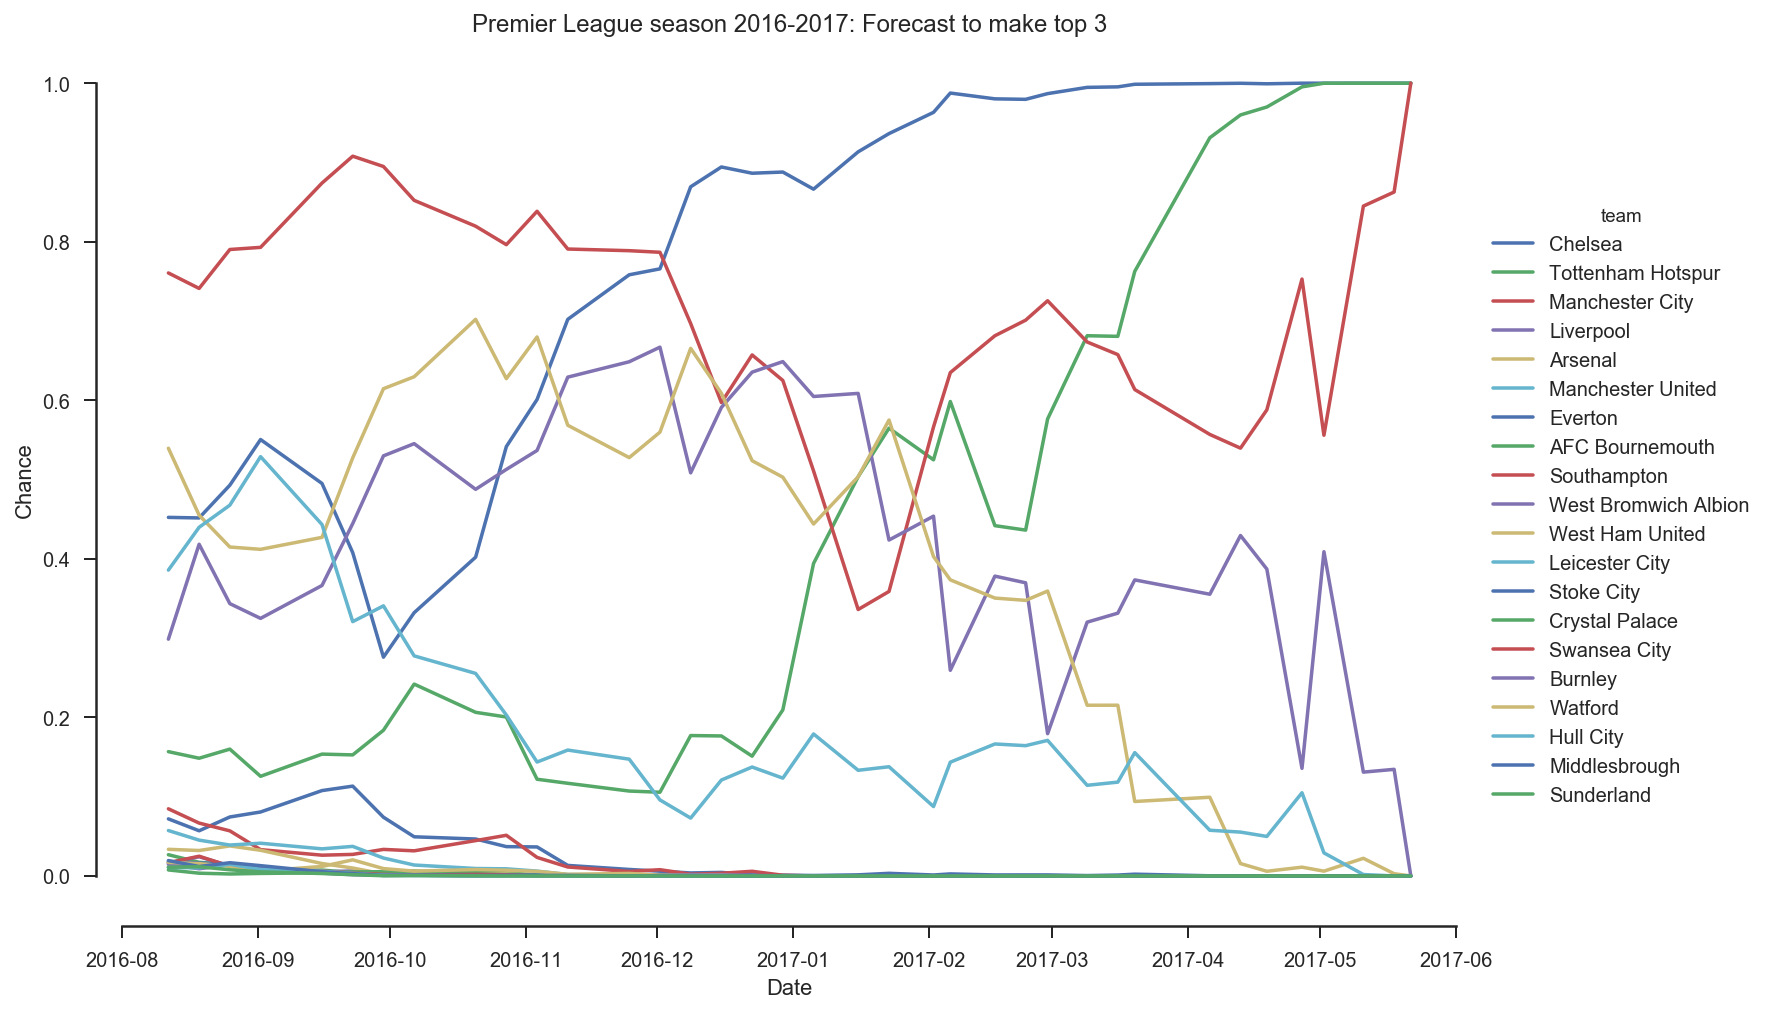

In [7]:
pal = sns.color_palette(n_colors=len(epl_top3_contenders.team.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(epl_top3_contenders, hue='team', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'top3_chance').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='Premier League season 2016-2017: Forecast to make top 3')
sns.despine(offset=5, trim=True);

...while as usual, La Liga showed a very different picture:

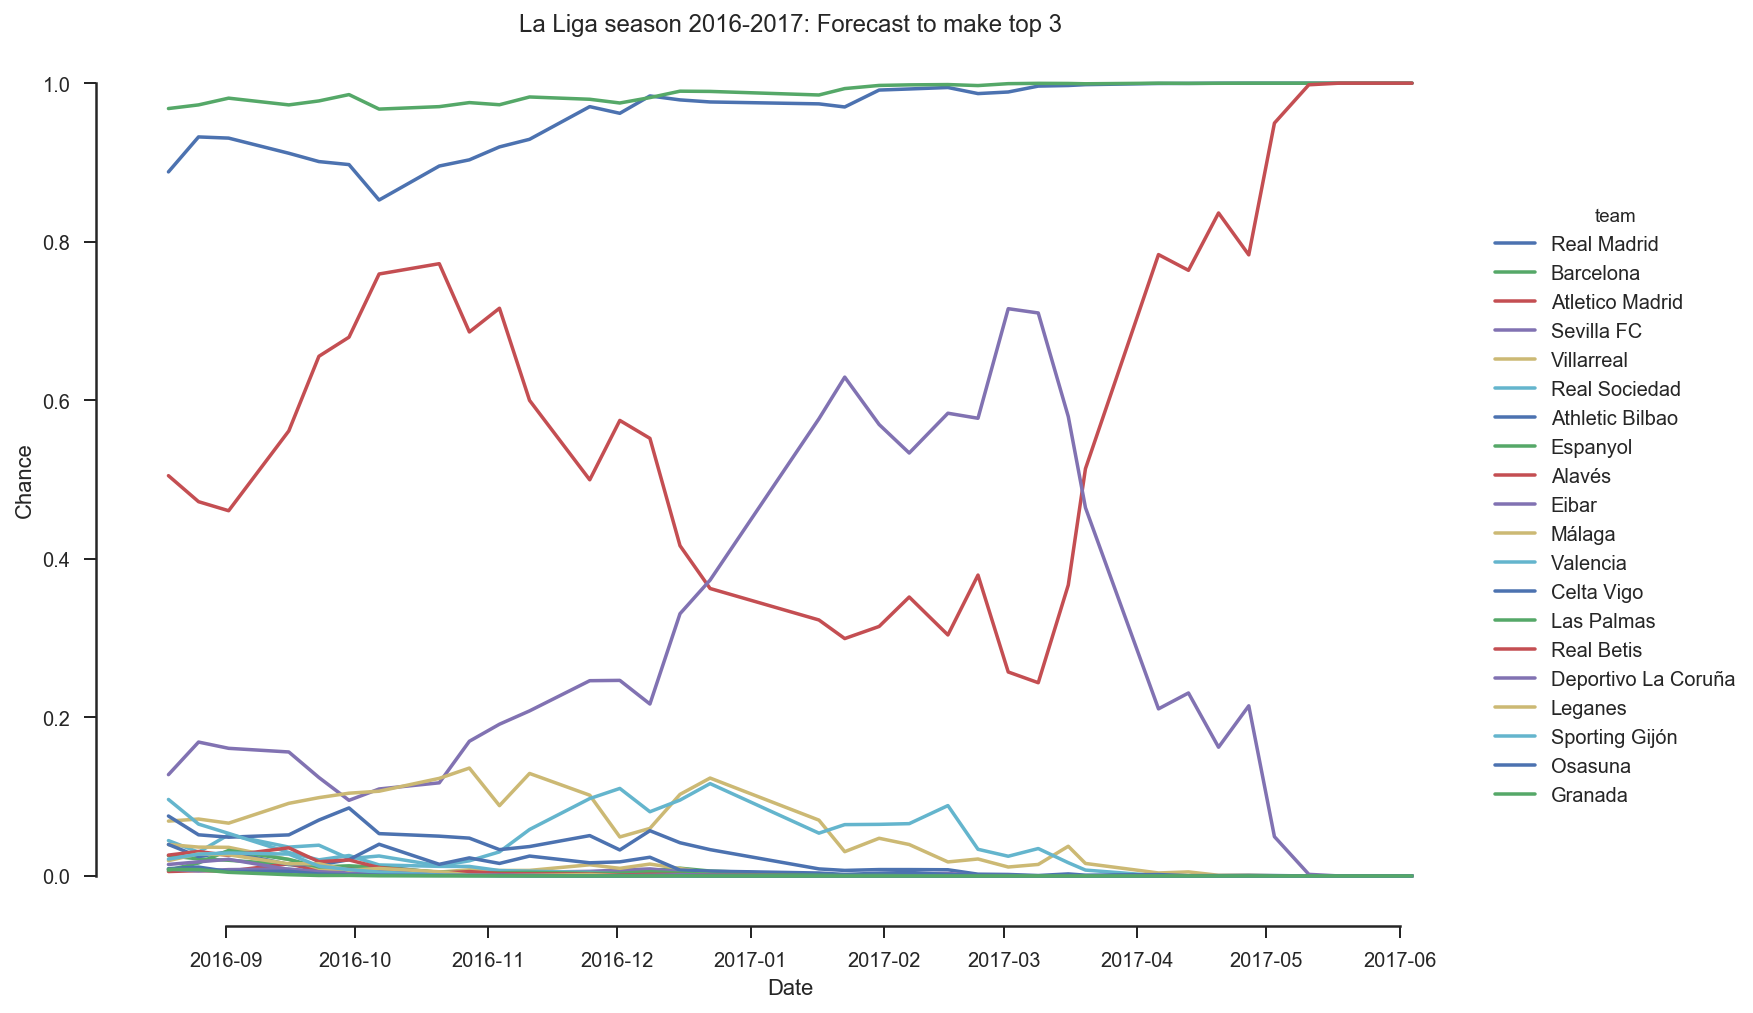

In [8]:
laliga_top3_contenders = (forecasts
    .loc['ESP-La Liga']
    .reset_index()
    .assign(top3_chance=lambda x: x.position_1 + x.position_2 + x.position_3)
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.team.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(laliga_top3_contenders, hue='team', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'top3_chance').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='La Liga season 2016-2017: Forecast to make top 3')
sns.despine(offset=5, trim=True);

When we look at actually winning La Liga, only Real and Barça ever had a chance. This has been the case for many years now in La Liga, so no surprise there.

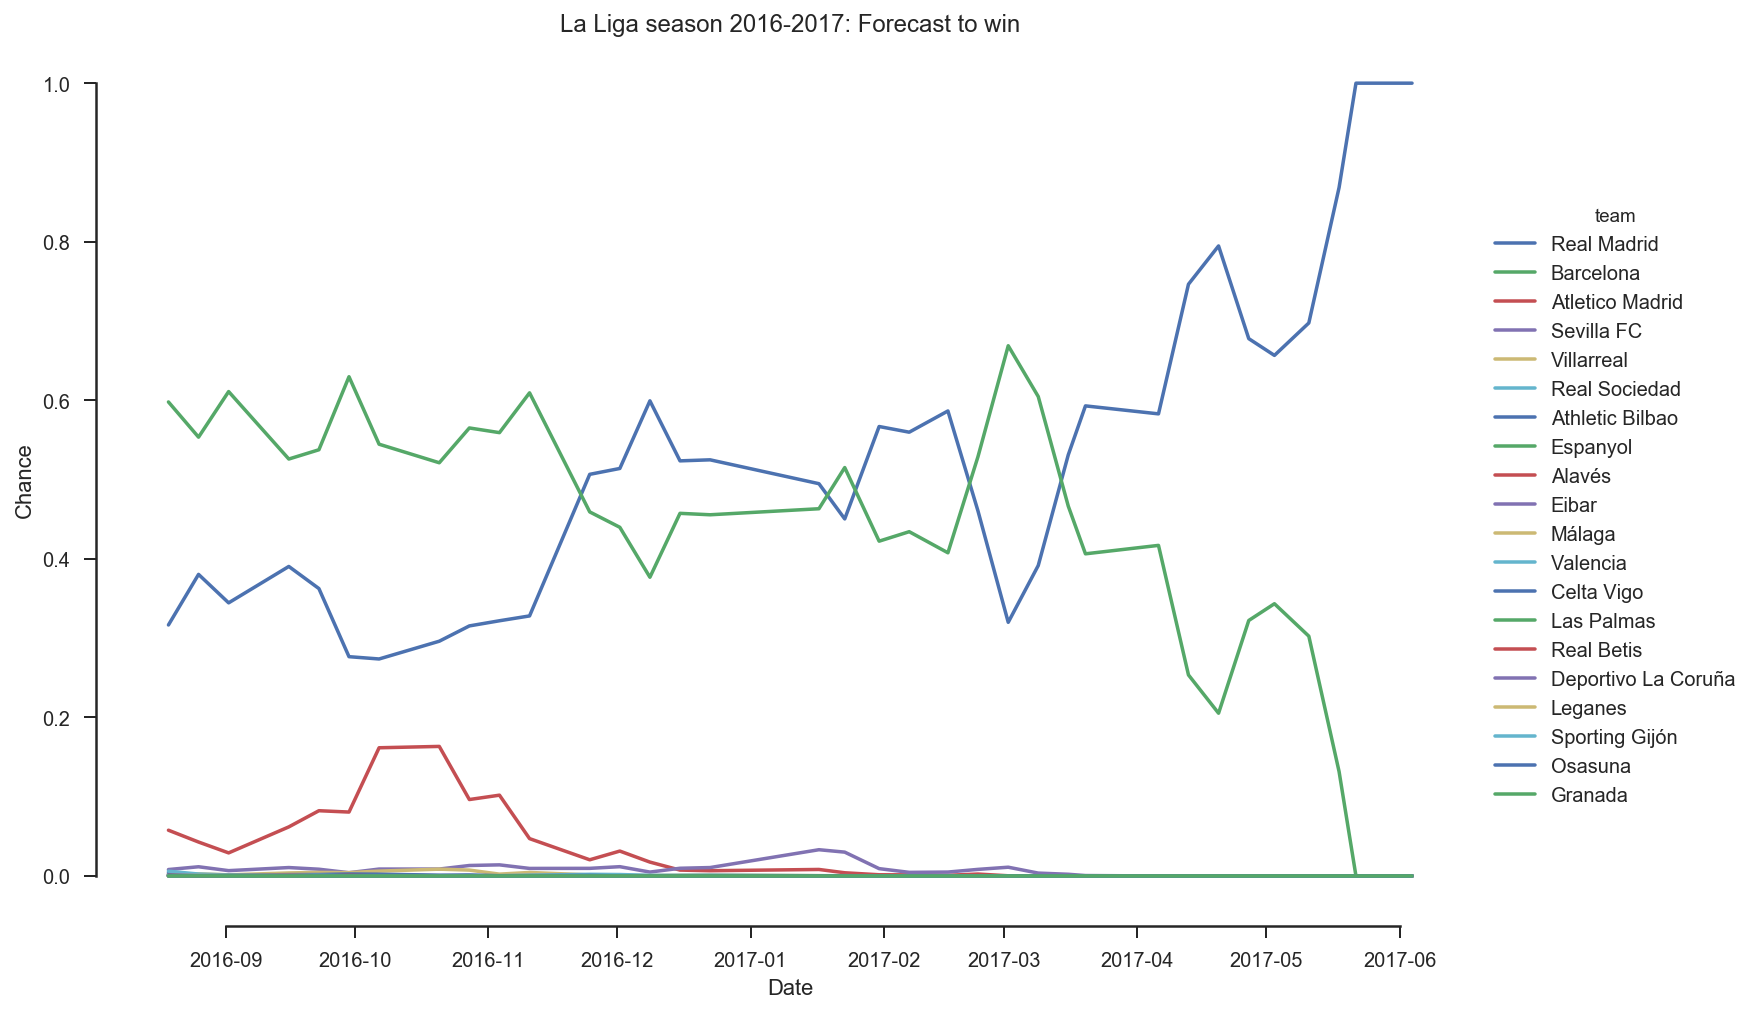

In [9]:
laliga_win_contenders = (forecasts
    .loc['ESP-La Liga']
    .reset_index()
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.team.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(laliga_win_contenders, hue='team', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'position_1').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='La Liga season 2016-2017: Forecast to win')
sns.despine(offset=5, trim=True);

...But the EPL winner for this season was decided as early as December:

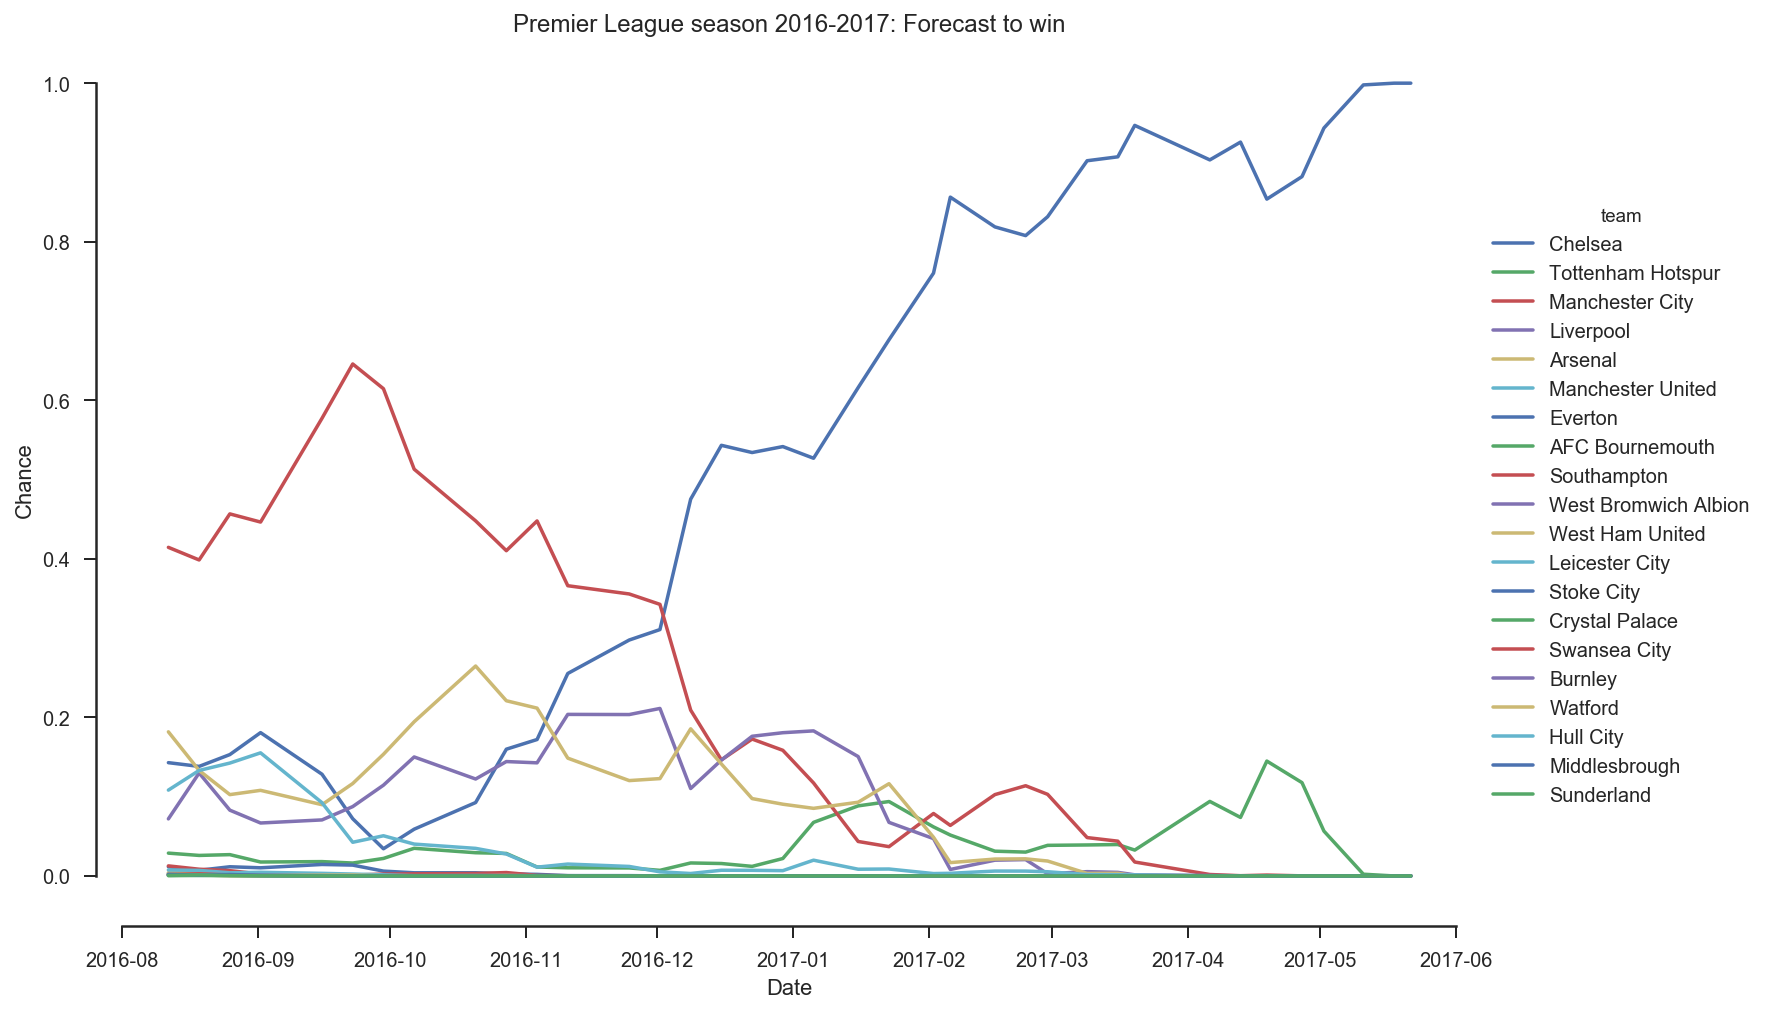

In [10]:
epl_win_contenders = (forecasts
    .loc['ENG-Premier League']
    .reset_index()
    .assign(points=lambda x: x.current_wins * 3 + x.current_ties)
    .sort_values(['last_updated', 'points'], ascending=False)
    )

pal = sns.color_palette(n_colors=len(laliga_top3_contenders.team.unique()))

sns.set_style("ticks")

g = sns.FacetGrid(epl_win_contenders, hue='team', size=7, aspect=1.5, palette=pal)
g.map(plt.plot, 'last_updated', 'position_1').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Chance',
         title='Premier League season 2016-2017: Forecast to win')
sns.despine(offset=5, trim=True);

# Match history

In [11]:
print(foo.MatchHistory.__doc__)

Provides pandas.DataFrames from CSV files available at
    http://www.football-data.co.uk/data.php

    Column names are explained here: http://www.football-data.co.uk/notes.txt

    Data will be downloaded as necessary and cached locally in ./data

    Parameters
    ----------
    leagues : string or iterable of league-ids to include, None for all
    seasons : string, int or list of seasons. Examples:
              '16-17'; 2016; '2016-17'; [14, 15, 16]
    


In [12]:
foo.MatchHistory.available_leagues()

['BEL-Jupiler League',
 'ENG-Championship',
 'ENG-Conference',
 'ENG-League 1',
 'ENG-League 2',
 'ENG-Premier League',
 'ESP-La Liga',
 'ESP-La Liga 2',
 'FRA-Ligue 1',
 'FRA-Ligue 2',
 'GER-Bundesliga',
 'GER-Bundesliga 2',
 'GRE-Ethniki Katigoria',
 'ITA-Serie A',
 'ITA-Serie B',
 'NED-Eredivisie',
 'POR-Liga 1',
 'SCO-Division 1',
 'SCO-Division 2',
 'SCO-Division 3',
 'SCO-Premier League',
 'TUR-Ligi 1']

# Home team advantage in the Dutch Eredivisie

We all know sports teams have an advantage when playing at home. Here's a look at home team advantage for 3 years of the Eredivisie, inspired by [this great example](https://tomaugspurger.github.io/modern-5-tidy.html) by Tom Augspurger.

Travel distances in the Netherlands are small, it would be interesting to compare this to competitions where the away team often have to travel further.

In [13]:
eredivisie = foo.MatchHistory('NED-Eredivisie', range(2014, 2017)).read_games()
eredivisie.sample(5)

index  \
league         season game_id                                        
NED-Eredivisie 1415   2014-11-23 PEC Zwolle-FC Twente          116   
               1516   2016-01-17 FC Groningen-FC Utrecht       160   
               1415   2015-02-15 PEC Zwolle-Go Ahead Eagles    206   
               1516   2016-02-07 Ajax-Feyenoord                194   
               1617   2016-08-28 PSV-FC Groningen               35   

                                                                   away_team  \
league         season game_id                                                  
NED-Eredivisie 1415   2014-11-23 PEC Zwolle-FC Twente              FC Twente   
               1516   2016-01-17 FC Groningen-FC Utrecht          FC Utrecht   
               1415   2015-02-15 PEC Zwolle-Go Ahead Eagles  Go Ahead Eagles   
               1516   2016-02-07 Ajax-Feyenoord                    Feyenoord   
               1617   2016-08-28 PSV-FC Groningen               FC Groningen   

                                                             B365A  B365D  \
league         season game_id                                               
NED-Eredivisie 1415   2014-11-23 PEC Zwolle-FC Twente         2.05   3.60   
               1516   2016-01-17 FC Groningen-FC Utrecht      2.70   3.40   
               1415   2015-02-15 PEC Zwolle-Go Ahead Eagles   6.00   4.00   
               1516   2016-02-07 Ajax-Feyenoord               4.50   3.75   
               1617   2016-08-28 PSV-FC Groningen            15.00   6.50   

                                                             B365H    BWA  \
league         season game_id                                               
NED-Eredivisie 1415   2014-11-23 PEC Zwolle-FC Twente         3.40   1.90   
               1516   2016-01-17 FC Groningen-FC Utrecht      2.50   2.75   
               1415   2015-02-15 PEC Zwolle-Go Ahead Eagles   1.53   4.40   
               1516   2016-02-07 Ajax-Feyenoord               1.73   4.75   
               1617   2016-08-28 PSV-FC Groningen             1.18  12.50   

                                                              BWD   BWH  \
league         season game_id                                             
NED-Eredivisie 1415   2014-11-23 PEC Zwolle-FC Twente        3.40  3.60   
               1516   2016-01-17 FC Groningen-FC Utrecht     3.30  2.40   
               1415   2015-02-15 PEC Zwolle-Go Ahead Eagles  4.00  1.60   
               1516   2016-02-07 Ajax-Feyenoord              3.70  1.67   
               1617   2016-08-28 PSV-FC Groningen            6.25  1.19   

                                                             Bb1X2  BbAH  \
league         season game_id                                              
NED-Eredivisie 1415   2014-11-23 PEC Zwolle-FC Twente           46    25   
               1516   2016-01-17 FC Groningen-FC Utrecht        44    25   
               1415   2015-02-15 PEC Zwolle-Go Ahead Eagles     49    31   
               1516   2016-02-07 Ajax-Feyenoord                 46    24   
               1617   2016-08-28 PSV-FC Groningen               51    27   

                                                             ...    PSH  SJA  \
league         season game_id                                ...               
NED-Eredivisie 1415   2014-11-23 PEC Zwolle-FC Twente        ...   3.56  NaN   
               1516   2016-01-17 FC Groningen-FC Utrecht     ...   2.48  NaN   
               1415   2015-02-15 PEC Zwolle-Go Ahead Eagles  ...   1.56  NaN   
               1516   2016-02-07 Ajax-Feyenoord              ...   1.72  NaN   
               1617   2016-08-28 PSV-FC Groningen            ...   1.22  NaN   

                                                             SJD  SJH    VCA  \
league         season game_id                                                  
NED-Eredivisie 1415   2014-11-23 PEC Zwolle-FC Twente        NaN  NaN   2.05   
               1516   2016-01-17 FC Groningen-FC Utrecht     NaN  NaN

In [14]:
def home_away_results(games: pd.DataFrame):
    """Returns aggregated home/away results per team"""
    
    res = (
        pd.melt(games.reset_index(),
                id_vars=['Date', 'FTR'],
                value_name='team', var_name='is_home',
                value_vars=['home_team', 'away_team']))

    res.is_home = res.is_home.replace(['home_team', 'away_team'], ['Home', 'Away'])
    res['win'] = res['lose'] = res['draw'] = 0
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'H'), 'win'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'A'), 'win'] = 1
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'A'), 'lose'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'H'), 'lose'] = 1
    res.loc[res['FTR'] == 'D', 'draw'] = 1

    g = res.groupby(['team', 'is_home'])
    w = (g.win.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_win', 'mean': 'win_pct'}))
    l = (g.lose.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_lose', 'mean': 'lose_pct'}))
    d = (g.draw.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_draw', 'mean': 'draw_pct'}))

    res = pd.concat([w, l, d], axis=1)
    return res

In [15]:
results = home_away_results(eredivisie)
results.head(6)

n_win   win_pct  n_lose  lose_pct  n_draw  draw_pct
team         is_home                                                     
ADO Den Haag Away        11  0.215686      27  0.529412      13  0.254902
             Home        19  0.372549      17  0.333333      15  0.294118
AZ Alkmaar   Away        25  0.490196      17  0.333333       9  0.176471
             Home        24  0.470588      13  0.254902      14  0.274510
Ajax         Away        32  0.627451       6  0.117647      13  0.254902
             Home        39  0.764706       4  0.078431       8  0.156863

The overall picture shows most teams have a clear advantage at home:

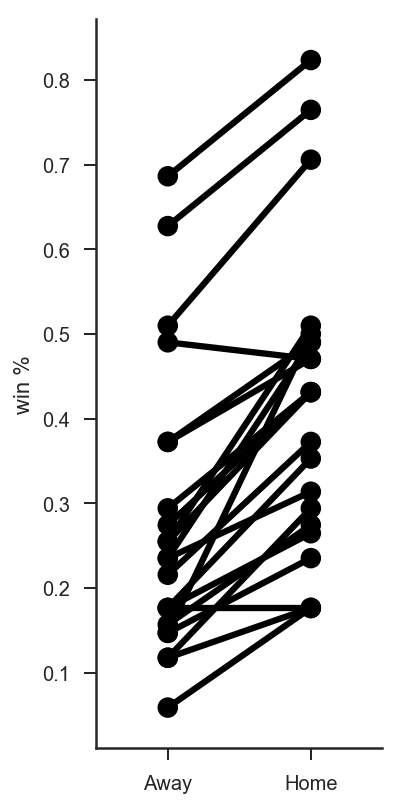

In [16]:
g = sns.FacetGrid(results.reset_index(), hue='team', palette=['k'], size=6, aspect=.5)
g.map(sns.pointplot, 'is_home', 'win_pct', scatter_kws={'alpha':0.3})
g.set_axis_labels('', 'win %');

But there are a few exceptions, namely AZ and NAC Breda. 

Now NAC win only about 17% of their games overall, so not much so say there. But AZ is a top 5 contender who in the past 3 years have won less games at home than away. Meanwhile have a look at NEC Nijmegen's home-away spread: their supporters seem to be doing a much better job.

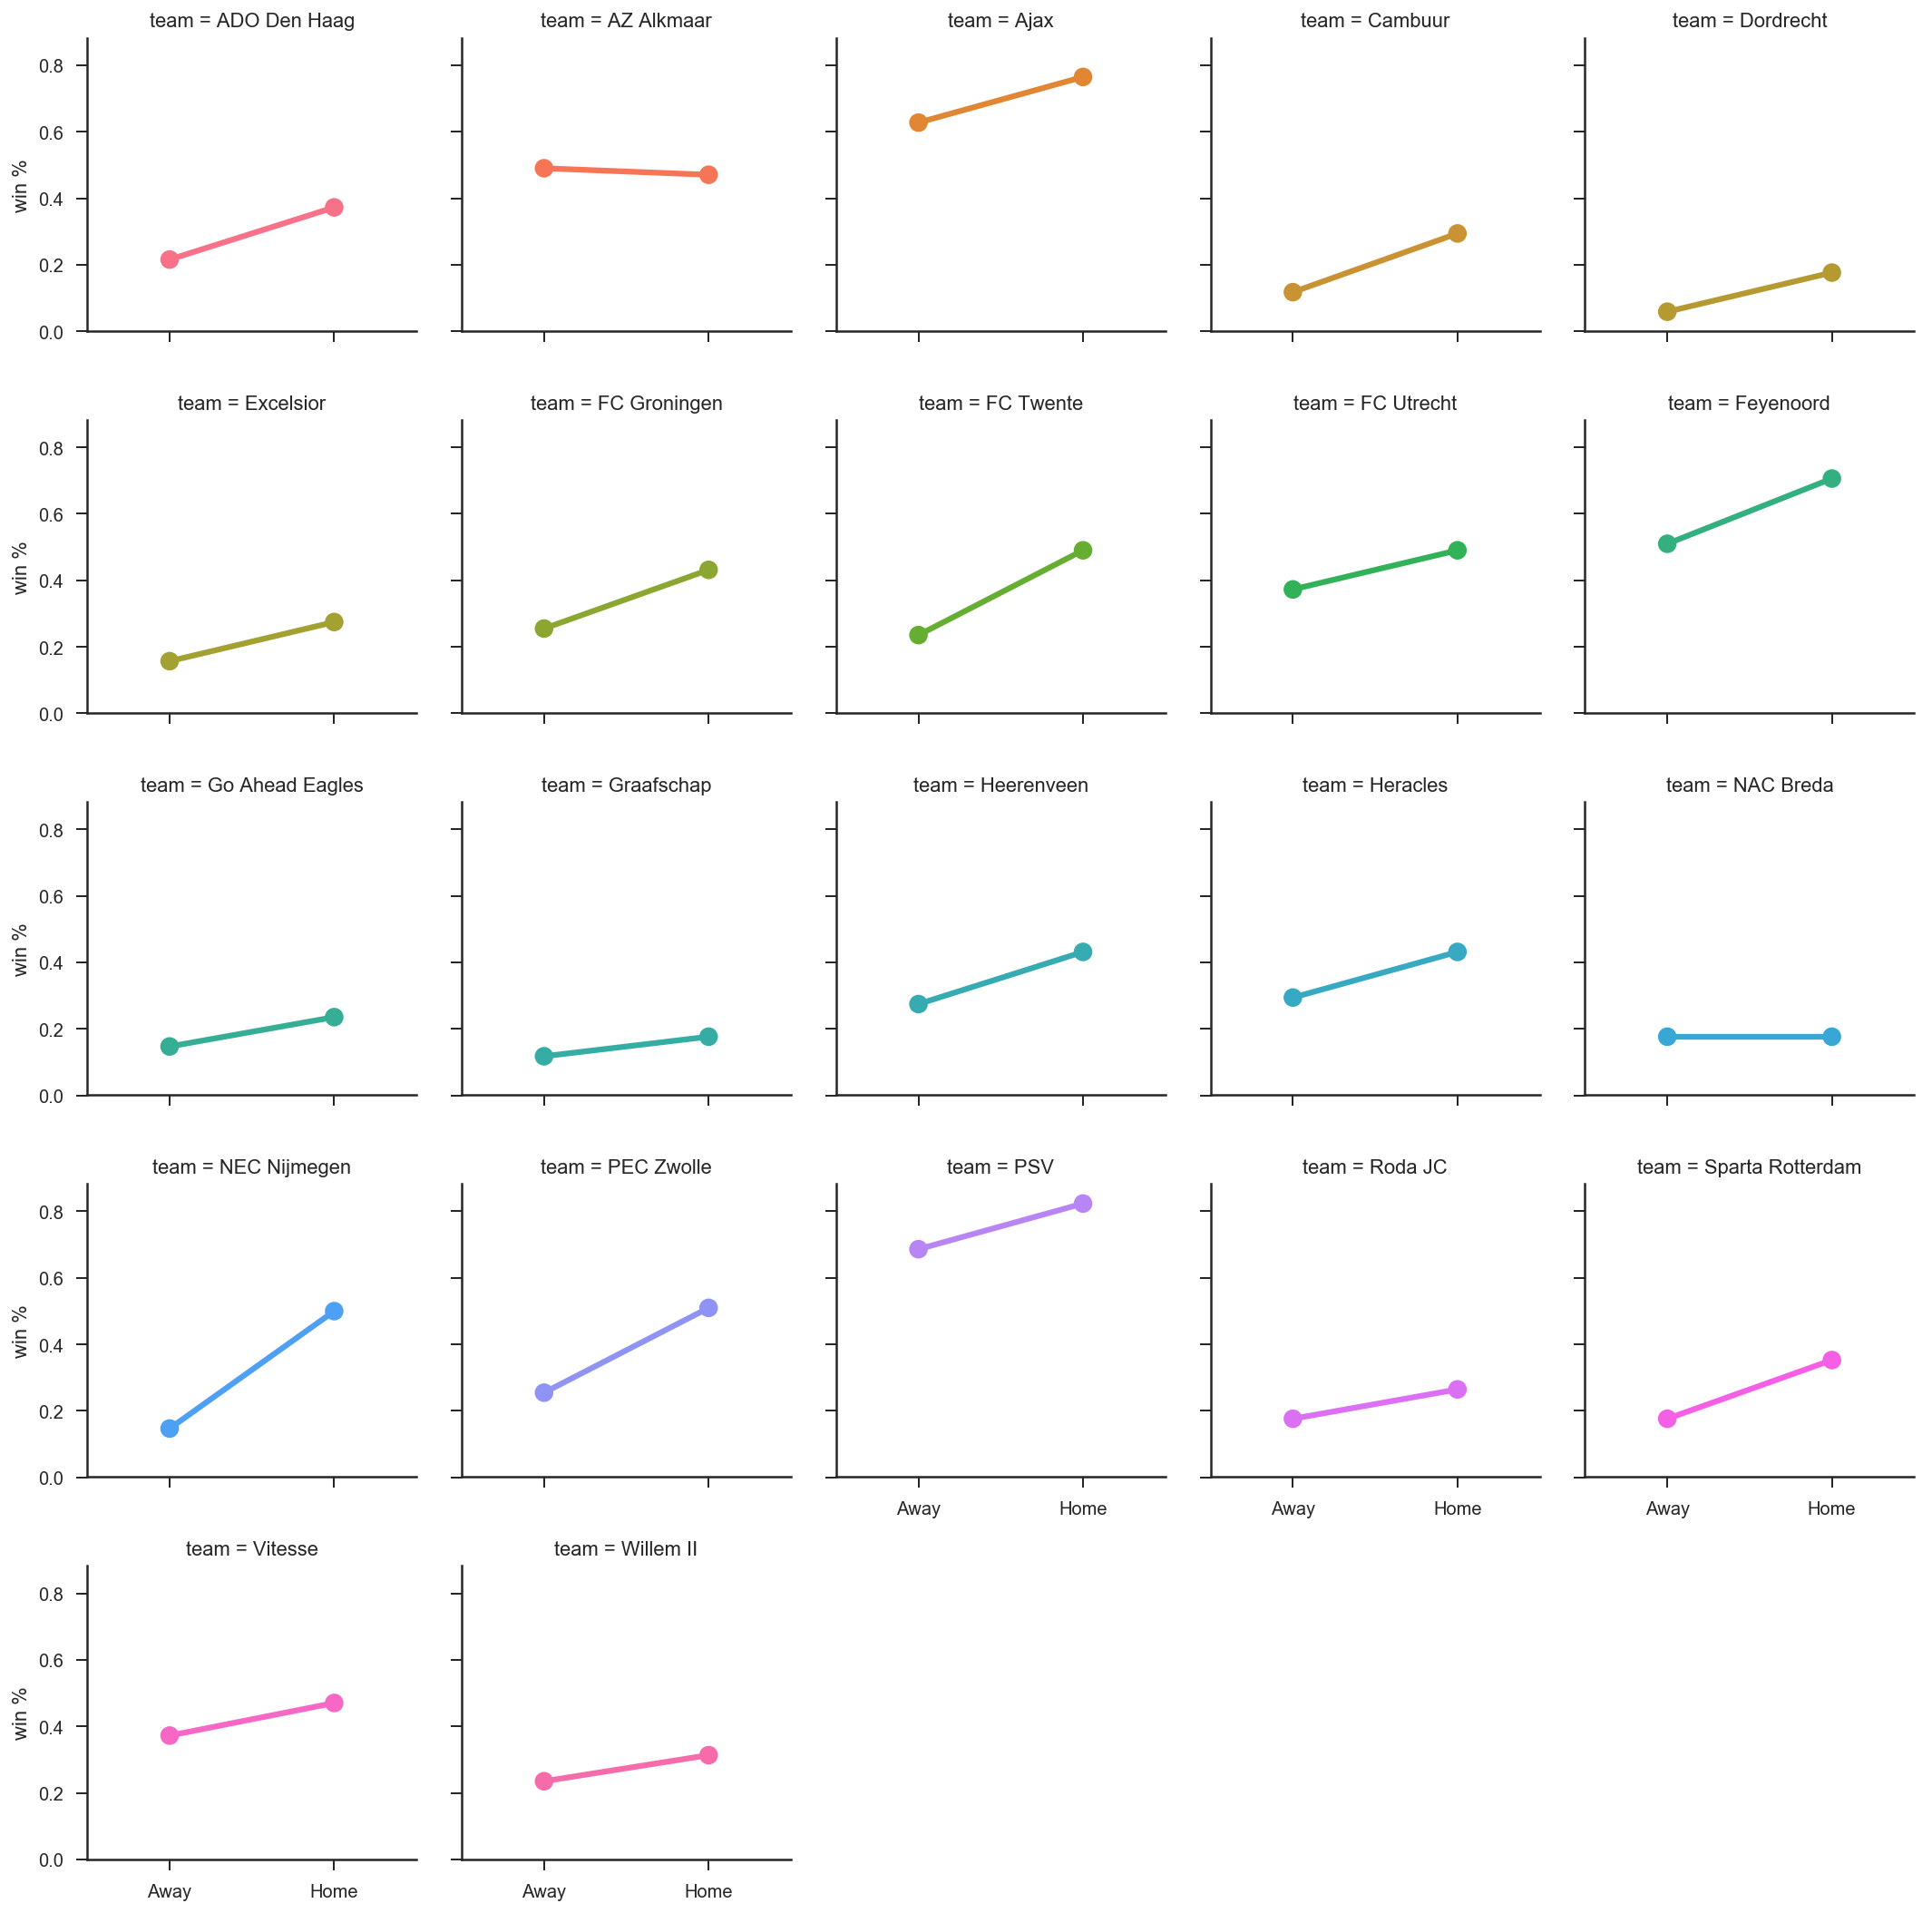

In [17]:
g = sns.FacetGrid(results.reset_index(), 
                  col='team', hue='team', col_wrap=5)
g.map(sns.pointplot, 'is_home', 'win_pct')
g.set_axis_labels('', 'win %');

In [18]:
results.loc['NEC Nijmegen']

,n_win,win_pct,n_lose,lose_pct,n_draw,draw_pct
is_home,,,,,,
Away,5,0.147059,21,0.617647,8,0.235294
Home,17,0.500000,11,0.323529,6,0.176471


# ClubElo

How did the current top 5 teams in the world develop over time?

In [19]:
elo = foo.ClubElo()
current_elo = elo.read_by_date()
current_elo.head()

,index,Rank,Country,Level,Elo,From,To,league
team,,,,,,,,
Real Madrid,0,1,ESP,1,2080.932861,2017-06-04,2017-08-19,ESP-La Liga
Barcelona,1,2,ESP,1,2019.554932,2017-06-04,2017-08-19,ESP-La Liga
Bayern,2,3,GER,1,1996.681396,2017-05-21,2017-08-19,GER-Bundesliga
Atletico,3,4,ESP,1,1950.027954,2017-06-04,2017-08-19,ESP-La Liga
Juventus,4,5,ITA,1,1940.884277,2017-06-04,2017-08-19,ITA-Serie A


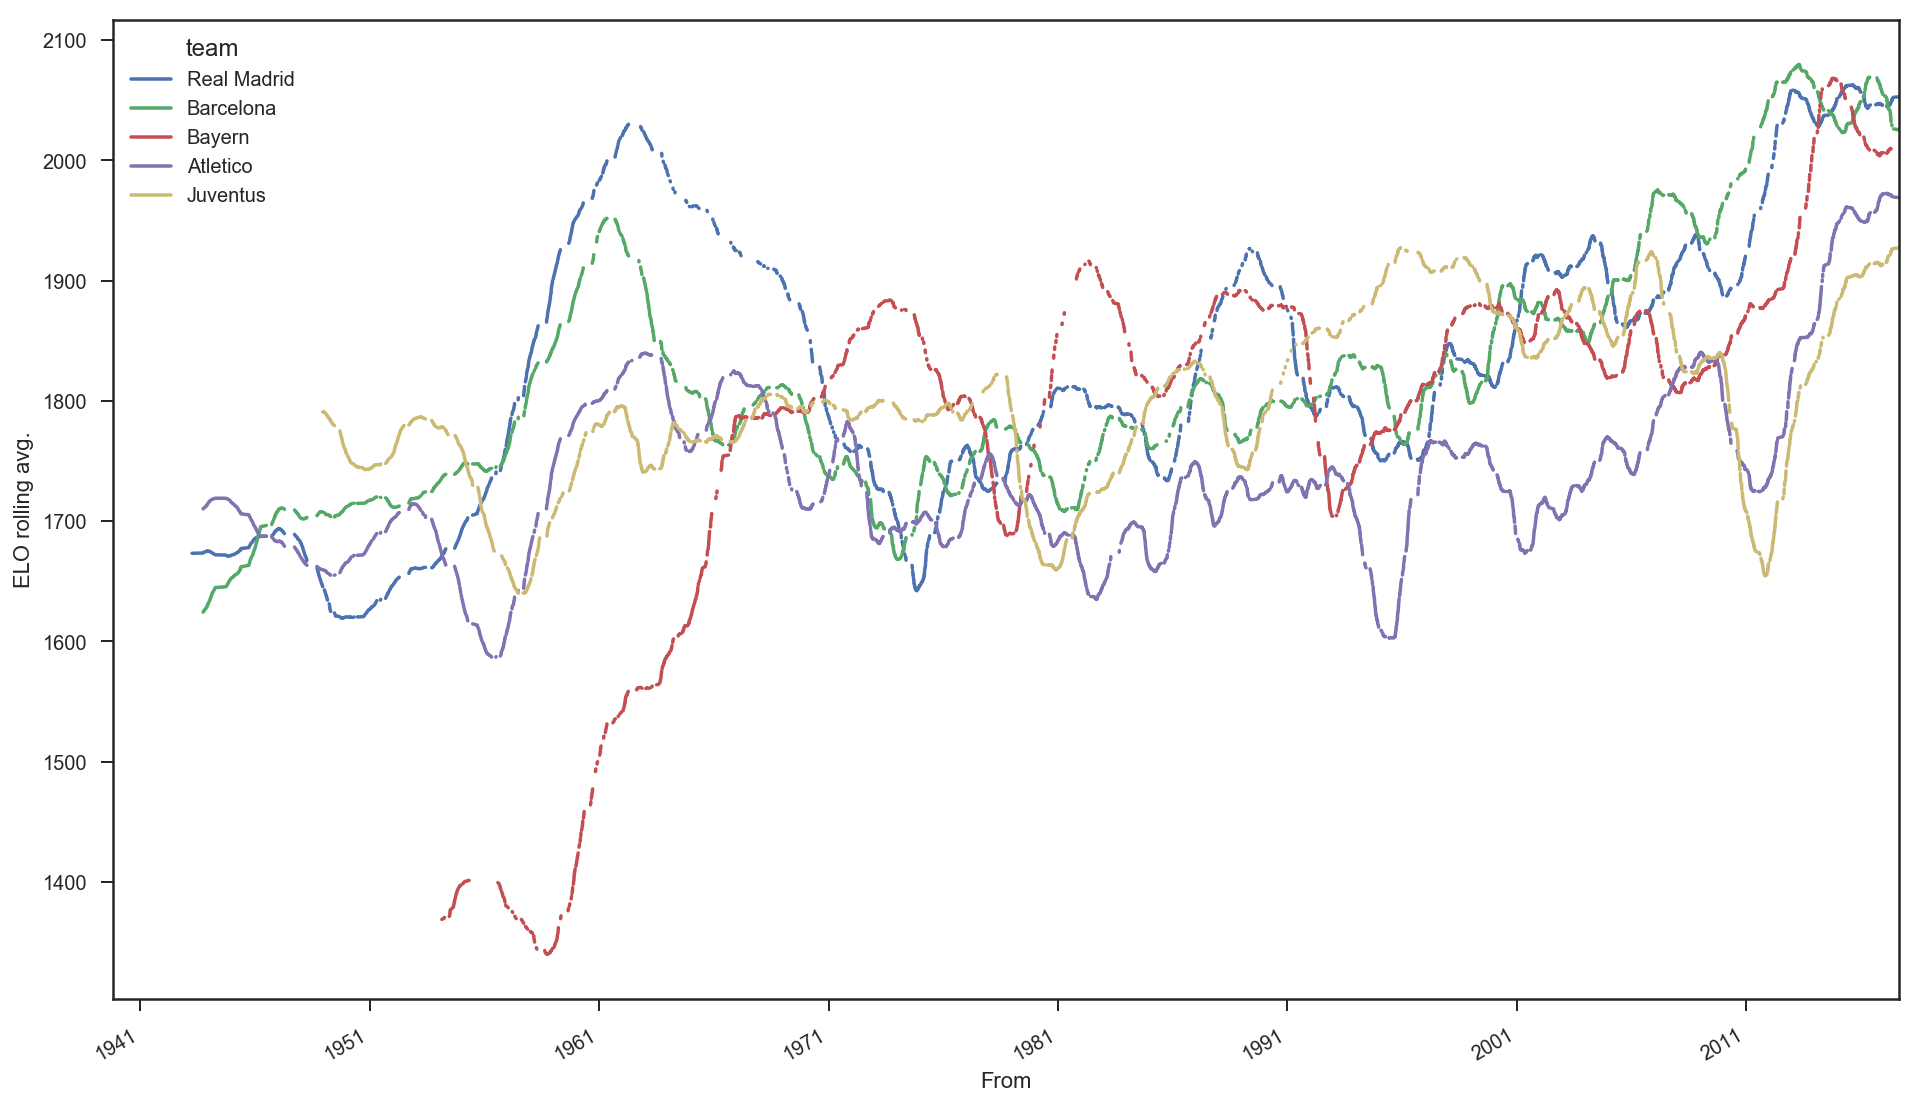

In [20]:
num_teams = 5
smoothing = 100
elo_top_development = pd.concat(
    [elo.read_team_history(team)['Elo'].rolling(smoothing).mean()
     for team in current_elo.reset_index()['team'][:num_teams]
    ],
    axis=1)
elo_top_development.columns = current_elo.reset_index()['team'][:num_teams]
elo_top_development.fillna(method='ffill')

fig = plt.figure(figsize=(16, 10))
ax1 = fig.add_subplot(111, ylabel='ELO rolling avg.', xlabel='Date')
elo_top_development.plot(ax=ax1);